In diesem Notebook werden Bilder mit den assoziierten Sensordaten dargestellt.

In [25]:
import pandas
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.interpolate import interp1d
import os
import numpy as np

In [4]:
# Lesen der Merkmale
featuresDf = pandas.read_csv("merkmale.csv")
featuresDf.describe()

,Zeitstempel,Breitengrad,Laengengrad,Geschwindigkeit,Messwerte,StartBewegungsD,StartBelichtung,Belichtungszeit,MittelX,MittelY,...,VarianzX,VarianzY,VarianzZ,VarianzNick,VarianzRoll,AbweichungX,AbweichungY,AbweichungZ,AbweichungNick,AbweichungRoll
count,4.164000e+03,4164.000000,4164.000000,4164.000000,4164.0,4.164000e+03,4.164000e+03,4.164000e+03,4164.000000,4164.000000,...,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000,4164.000000
mean,1.520233e+12,53.613483,10.137698,0.007556,10.0,2.264945e+14,2.264947e+14,3.279630e+07,-0.000613,-0.000108,...,0.000432,0.000201,0.000631,0.000003,0.000014,0.015147,0.013235,0.019368,0.000461,0.000848
std,4.067961e+05,0.000021,0.000039,0.128715,0.0,4.067913e+11,4.067962e+11,4.655649e+05,0.025055,0.008104,...,0.004887,0.000521,0.004595,0.000033,0.000215,0.014246,0.005123,0.015996,0.001560,0.003673
min,1.520233e+12,53.613420,10.137633,0.000000,10.0,2.257848e+14,2.257849e+14,2.999632e+07,-1.293692,-0.274551,...,0.000010,0.000000,0.000020,0.000000,0.000000,0.003160,0.000000,0.004470,0.000000,0.000000
25%,1.520233e+12,53.613472,10.137681,0.000000,10.0,2.261525e+14,2.261526e+14,3.287369e+07,-0.002702,-0.002960,...,0.000130,0.000120,0.000180,0.000000,0.000000,0.011400,0.010950,0.013420,0.000000,0.000000
50%,1.520233e+12,53.613490,10.137691,0.000000,10.0,2.265032e+14,2.265034e+14,3.287369e+07,-0.000101,-0.000161,...,0.000180,0.000160,0.000260,0.000000,0.000000,0.013420,0.012650,0.016120,0.000000,0.000000
75%,1.520234e+12,53.613500,10.137706,0.000000,10.0,2.268460e+14,2.268462e+14,3.287369e+07,0.002587,0.002808,...,0.000260,0.000230,0.000380,0.000000,0.000000,0.016120,0.015170,0.019490,0.000000,0.000000
max,1.520234e+12,53.613533,10.137800,3.420000,10.0,2.271917e+14,2.271919e+14,3.287369e+07,0.323269,0.154181,...,0.236390,0.028030,0.255660,0.001950,0.009370,0.486200,0.167420,0.505630,0.044160,0.096800


In [5]:
featuresDf.columns

Index(['Zeitstempel', 'Breitengrad', 'Laengengrad', 'Geschwindigkeit',
       'AccelerometerX', 'AccelerometerY', 'AccelerometerZ', 'Azimuth', 'Nick',
       'Roll', 'SensorZeitstempel', 'Messwerte', 'StartBewegungsD',
       'StartBelichtung', 'Belichtungszeit', 'MittelX', 'MittelY', 'MittelZ',
       'MittelNick', 'MittelRoll', 'AzimuthAenderung', 'VarianzX', 'VarianzY',
       'VarianzZ', 'VarianzNick', 'VarianzRoll', 'AbweichungX', 'AbweichungY',
       'AbweichungZ', 'AbweichungNick', 'AbweichungRoll'],
      dtype='object')

In [42]:
sensorTimestampsDf = pandas.DataFrame(np.array(featuresDf.SensorZeitstempel.str.split(" ").tolist()).astype(float))
accX = pandas.DataFrame(np.array(featuresDf.AccelerometerX.str.split(" ").tolist()).astype(float))
accY = pandas.DataFrame(np.array(featuresDf.AccelerometerY.str.split(" ").tolist()).astype(float))
accZ = pandas.DataFrame(np.array(featuresDf.AccelerometerZ.str.split(" ").tolist()).astype(float))
nick = pandas.DataFrame(np.array(featuresDf.Nick.str.split(" ").tolist()).astype(float))
roll = pandas.DataFrame(np.array(featuresDf.Roll.str.split(" ").tolist()).astype(float))
azimuth = pandas.DataFrame(np.array(featuresDf.Azimuth.str.split(" ").tolist()).astype(float))

In [89]:
row = 4 # TODO änderung Zugriff mit Hilde eines Zeitstempels?

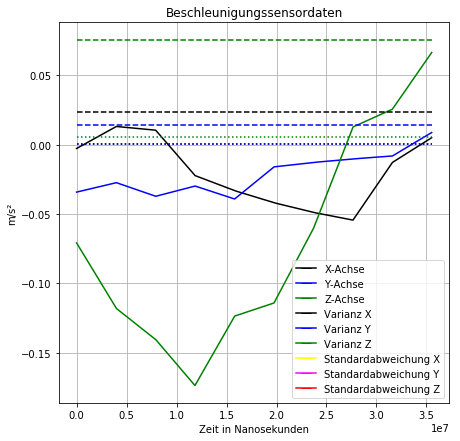

In [112]:
plt.figure(figsize=(7,7))
fAccX = interp1d(np.asarray(sensorTimestampsDf.iloc[[row]]).squeeze(),np.asarray(accX.iloc[[row]]).squeeze())
fAccY = interp1d(np.asarray(sensorTimestampsDf.iloc[[row]]).squeeze(),np.asarray(accY.iloc[[row]]).squeeze())
fAccZ = interp1d(np.asarray(sensorTimestampsDf.iloc[[row]]).squeeze(),np.asarray(accZ.iloc[[row]]).squeeze())
xnew = np.arange(sensorTimestampsDf.iloc[row,0],sensorTimestampsDf.iloc[row,-1],10000)
plt.plot(xnew,fAccX(xnew),'k-',xnew,fAccY(xnew),'b-',xnew,fAccZ(xnew),'g-',
        [sensorTimestampsDf.iloc[row,0],sensorTimestampsDf.iloc[row,-1]],[featuresDf.VarianzX.iloc[row],featuresDf.VarianzX.iloc[row]], 'k:',
        [sensorTimestampsDf.iloc[row,0],sensorTimestampsDf.iloc[row,-1]],[featuresDf.VarianzY.iloc[row],featuresDf.VarianzY.iloc[row]], 'b:',
        [sensorTimestampsDf.iloc[row,0],sensorTimestampsDf.iloc[row,-1]],[featuresDf.VarianzZ.iloc[row],featuresDf.VarianzZ.iloc[row]], 'g:',
        [sensorTimestampsDf.iloc[row,0],sensorTimestampsDf.iloc[row,-1]],[featuresDf.AbweichungX.iloc[row],featuresDf.AbweichungX.iloc[row]], 'k--',
        [sensorTimestampsDf.iloc[row,0],sensorTimestampsDf.iloc[row,-1]],[featuresDf.AbweichungY.iloc[row],featuresDf.AbweichungY.iloc[row]], 'b--',
        [sensorTimestampsDf.iloc[row,0],sensorTimestampsDf.iloc[row,-1]],[featuresDf.AbweichungZ.iloc[row],featuresDf.AbweichungZ.iloc[row]], 'g--')
x_line = mlines.Line2D([], [], color='black', marker='_',
                          markersize=10, label='X-Achse')
y_line = mlines.Line2D([], [], color='blue', marker='_',
                          markersize=10, label='Y-Achse')
z_line = mlines.Line2D([], [], color='green', marker='_',
                          markersize=10, label='Z-Achse')
vx_line = mlines.Line2D([], [], color='black', marker='_',
                          markersize=10, label='Varianz X')
vy_line = mlines.Line2D([], [], color='blue', marker='_',
                          markersize=10, label='Varianz Y')
vz_line = mlines.Line2D([], [], color='green', marker='_',
                          markersize=10, label='Varianz Z')
ax_line = mlines.Line2D([], [], color='yellow', marker='_',
                          markersize=10, label='Standardabweichung X')
ay_line = mlines.Line2D([], [], color='magenta', marker='_',
                          markersize=10, label='Standardabweichung Y')
az_line = mlines.Line2D([], [], color='red', marker='_',
                          markersize=10, label='Standardabweichung Z')
plt.legend(handles=[x_line,y_line,z_line,vx_line,vy_line,vz_line,ax_line,ay_line,az_line])
plt.title('Beschleunigungssensordaten')
plt.xlabel('Zeit in Nanosekunden')
plt.ylabel('m/s²')
plt.grid()

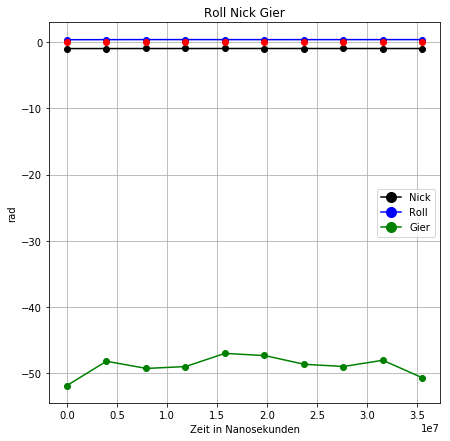

In [53]:
plt.figure(figsize=(7,7))
fNick = interp1d(np.asarray(sensorTimestampsDf.iloc[[row]]).squeeze(),np.asarray(nick.iloc[[row]]).squeeze())
fRoll = interp1d(np.asarray(sensorTimestampsDf.iloc[[row]]).squeeze(),np.asarray(roll.iloc[[row]]).squeeze())
fAzimuth = interp1d(np.asarray(sensorTimestampsDf.iloc[[row]]).squeeze(),np.asarray(azimuth.iloc[[row]]).squeeze())
plt.plot(sensorTimestampsDf.iloc[[row]],nick.iloc[[row]],'ko',xnew,fNick(xnew),'k-',
        sensorTimestampsDf.iloc[[row]],roll.iloc[[row]],'bo',xnew,fRoll(xnew),'b-',
        sensorTimestampsDf.iloc[[row]],azimuth.iloc[[row]],'go',xnew,fAzimuth(xnew),'g-')
nick_line = mlines.Line2D([], [], color='black', marker='o',
                          markersize=10, label='Nick')
roll_line = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=10, label='Roll')
azimuth_line = mlines.Line2D([], [], color='green', marker='o',
                          markersize=10, label='Gier')
plt.legend(handles=[nick_line,roll_line,azimuth_line])
plt.title('Roll Nick Gier')
plt.xlabel('Zeit in Nanosekunden')
plt.ylabel('rad')
plt.grid()

In [ ]:
plt.figure(figsize=(7,7))
fNick = interp1d(np.asarray(sensorTimestampsDf.iloc[[row]]).squeeze(),np.asarray(nick.iloc[[row]]).squeeze())
fRoll = interp1d(np.asarray(sensorTimestampsDf.iloc[[row]]).squeeze(),np.asarray(roll.iloc[[row]]).squeeze())
fAzimuth = interp1d(np.asarray(sensorTimestampsDf.iloc[[row]]).squeeze(),np.asarray(azimuth.iloc[[row]]).squeeze())
plt.plot(sensorTimestampsDf.iloc[[row]],nick.iloc[[row]],'ko',xnew,fNick(xnew),'k-',
        sensorTimestampsDf.iloc[[row]],roll.iloc[[row]],'bo',xnew,fRoll(xnew),'b-',
        sensorTimestampsDf.iloc[[row]],azimuth.iloc[[row]],'go',xnew,fAzimuth(xnew),'g-')
nick_line = mlines.Line2D([], [], color='black', marker='o',
                          markersize=10, label='Nick')
roll_line = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=10, label='Roll')
azimuth_line = mlines.Line2D([], [], color='green', marker='o',
                          markersize=10, label='Gier')
plt.legend(handles=[nick_line,roll_line,azimuth_line])
plt.title('Roll Nick Gier')
plt.xlabel('Zeit in Nanosekunden')
plt.ylabel('rad')
plt.grid()

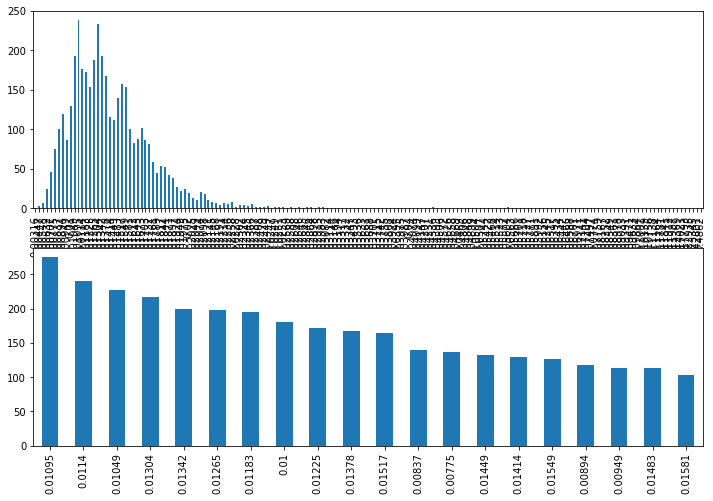

In [17]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))
featuresDf.AbweichungX.value_counts().sort_index().plot.bar(
    ax=axarr[0]
)

featuresDf.AbweichungY.value_counts().head(20).plot.bar(
    ax=axarr[1]
)
plt.show()